In [53]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [78]:
# https://www.gob.mx/salud/documentos/datos-abiertos-152127

In [2]:
df = pd.read_csv(r'/Users/kmontocam/Documents/GitHub/211122COVID19MEXICO.csv')

/Users/kmontocam/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-11-22,z2eace,1,3,15,1,15,15,106,2,...,2,1,4,2,97,6,99,México,97,2
1,2021-11-22,z1e370,1,12,14,1,14,14,85,1,...,2,1,2,2,97,7,99,México,97,97
2,2021-11-22,z38de4,1,12,7,1,7,7,101,1,...,2,2,97,2,97,6,99,México,97,97
3,2021-11-22,z579ac,1,12,15,2,15,15,60,1,...,2,1,4,2,97,6,99,México,97,97
4,2021-11-22,z2669f,2,12,14,2,14,14,39,1,...,1,1,2,2,97,7,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11709476,2021-11-22,m0b8c03,2,12,15,2,15,15,67,1,...,99,2,97,1,2,7,99,México,97,97
11709477,2021-11-22,m00747b,2,12,15,1,15,15,999,1,...,99,2,97,1,2,7,99,México,97,97
11709478,2021-11-22,m148c71,2,12,15,1,15,15,999,1,...,99,2,97,1,2,7,99,México,97,97
11709479,2021-11-22,m0944b9,2,12,15,1,15,15,999,1,...,99,2,97,1,2,7,99,México,97,97


In [4]:
df.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [5]:
# Keep relevant columns

df_test = df[['FECHA_INGRESO','CLASIFICACION_FINAL']]

In [6]:
## Read values as their data type

df_test['FECHA_INGRESO'] = pd.to_datetime(df['FECHA_INGRESO'])
df_test['CLASIFICACION_FINAL'] = pd.to_numeric(df_test['CLASIFICACION_FINAL'])

## Filter non positive SARSCOV2 
df_test['CLASIFICACION_FINAL'] = df[df['CLASIFICACION_FINAL'] == 3]['CLASIFICACION_FINAL']
df_test = df_test.dropna()
df_test

<ipython-input-6-5c00f7ce1c99>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['FECHA_INGRESO'] = pd.to_datetime(df['FECHA_INGRESO'])
<ipython-input-6-5c00f7ce1c99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['CLASIFICACION_FINAL'] = pd.to_numeric(df_test['CLASIFICACION_FINAL'])
<ipython-input-6-5c00f7ce1c99>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,FECHA_INGRESO,CLASIFICACION_FINAL
5,2020-06-12,3.0
8,2020-06-02,3.0
10,2020-07-01,3.0
13,2020-08-07,3.0
14,2020-09-23,3.0
...,...,...
11709452,2021-10-16,3.0
11709453,2021-10-16,3.0
11709465,2021-10-16,3.0
11709467,2021-10-16,3.0


In [7]:
series = df_test.pivot_table(columns = ['FECHA_INGRESO'], aggfunc = 'size')

Text(0.5, 1.0, 'Gráfico de contingencia, COVID-19 en México')

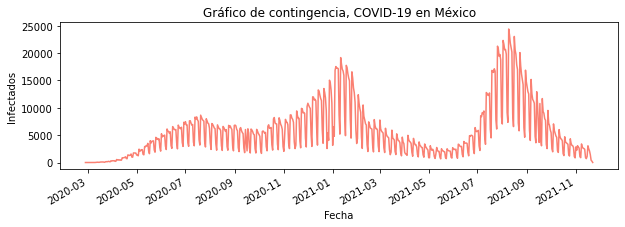

In [82]:
series.plot(subplots = True, figsize = (10, 3), color = 'salmon')
plt.ylabel('Infectados')
plt.xlabel('Fecha')
plt.title('Gráfico de contingencia, COVID-19 en México')
#plt.savefig('historicocovid.png')

In [9]:
series[series == max(series)]

FECHA_INGRESO
2021-08-09    24399
dtype: int64

array([<AxesSubplot:xlabel='FECHA_INGRESO'>], dtype=object)

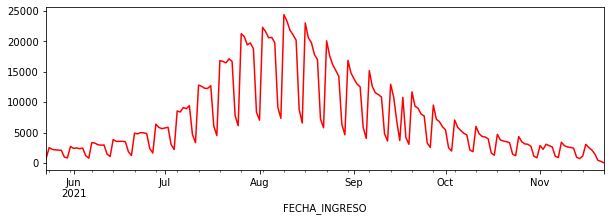

In [10]:
start_date = dt.date(2021, 5, 23)
series_beyond_20210523 = series[start_date:]
series_beyond_20210523.plot(subplots = True, figsize = (10, 3), color = 'red')

array([<AxesSubplot:xlabel='FECHA_INGRESO'>], dtype=object)

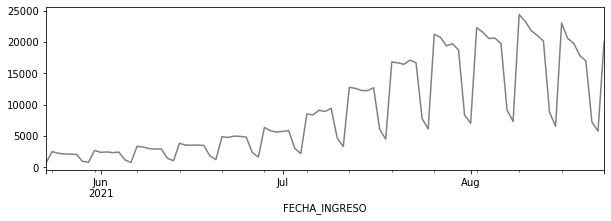

In [64]:
end_date = dt.date(2021, 8, 23)
time_span = series[start_date:end_date]
time_span.plot(subplots = True, figsize = (10,3), color = 'gray')

In [59]:
first2weeks = series[:14]

first2weeks.to_csv('first2weeks.csv')

In [62]:
X = (first2weeks.index -  first2weeks.index[0]).days
X

Int64Index([0, 1, 2, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64', name='FECHA_INGRESO')

Text(0.5, 1.0, 'Primeras dos semanas contagios, COVID-19 en México')

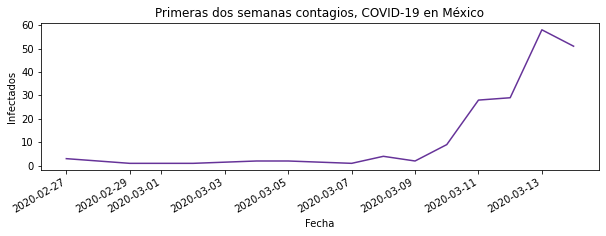

In [74]:
first2weeks.plot(subplots = True, figsize = (10, 3), color = 'rebeccapurple')
plt.ylabel('Infectados')
plt.xlabel('Fecha')
plt.title('Primeras dos semanas contagios, COVID-19 en México')